<a href="https://colab.research.google.com/github/aniket-pratap-singh/RiceGrain-Analysis/blob/main/RiceGrain_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing libraries**

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
from scipy.stats import gaussian_kde
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable


In [ ]:
df = pd.read_csv(r"/content/ricegrain_csv.csv")

In [ ]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Target
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,1
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,1
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,1
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,1
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Target             3810 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 238.3 KB


from above we can conclude all the data is numeric

# [**Pre Processing** ]

**checking for null/missing values**

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values:\n")
print(missing_values)

if df.isnull().values.any():
    print("There are missing values in the DataFrame.")
else:
    print("\nTherefore there are no missing values in the DataFrame.")

Missing Values:

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Target               0
dtype: int64

Therefore there are no missing values in the DataFrame.


# **Prelimnary Analysis**

### **Box-Plots**

In [ ]:
description = df.describe().T
table = tabulate(description, tablefmt='grid', headers='keys', showindex=True, \
                 colalign=("center", "center", "center", "center", "center", "center", "center", "center", "center"))
print(table)

+-------------------+---------+----------+-----------+----------+----------+----------+----------+----------+
|                   |  count  |   mean   |    std    |   min    |   25%    |   50%    |   75%    |   max    |
+===================+=========+==========+===========+==========+==========+==========+==========+==========+
|       Area        |  3810   | 12667.7  |  1732.37  |   7551   | 11370.5  | 12421.5  |  13950   |  18913   |
+-------------------+---------+----------+-----------+----------+----------+----------+----------+----------+
|     Perimeter     |  3810   | 454.239  |  35.5971  |  359.1   | 426.145  | 448.852  | 483.684  | 548.446  |
+-------------------+---------+----------+-----------+----------+----------+----------+----------+----------+
| Major_Axis_Length |  3810   | 188.776  |  17.4487  | 145.264  | 174.354  |  185.81  |  203.55  |  239.01  |
+-------------------+---------+----------+-----------+----------+----------+----------+----------+----------+
| Minor_Ax

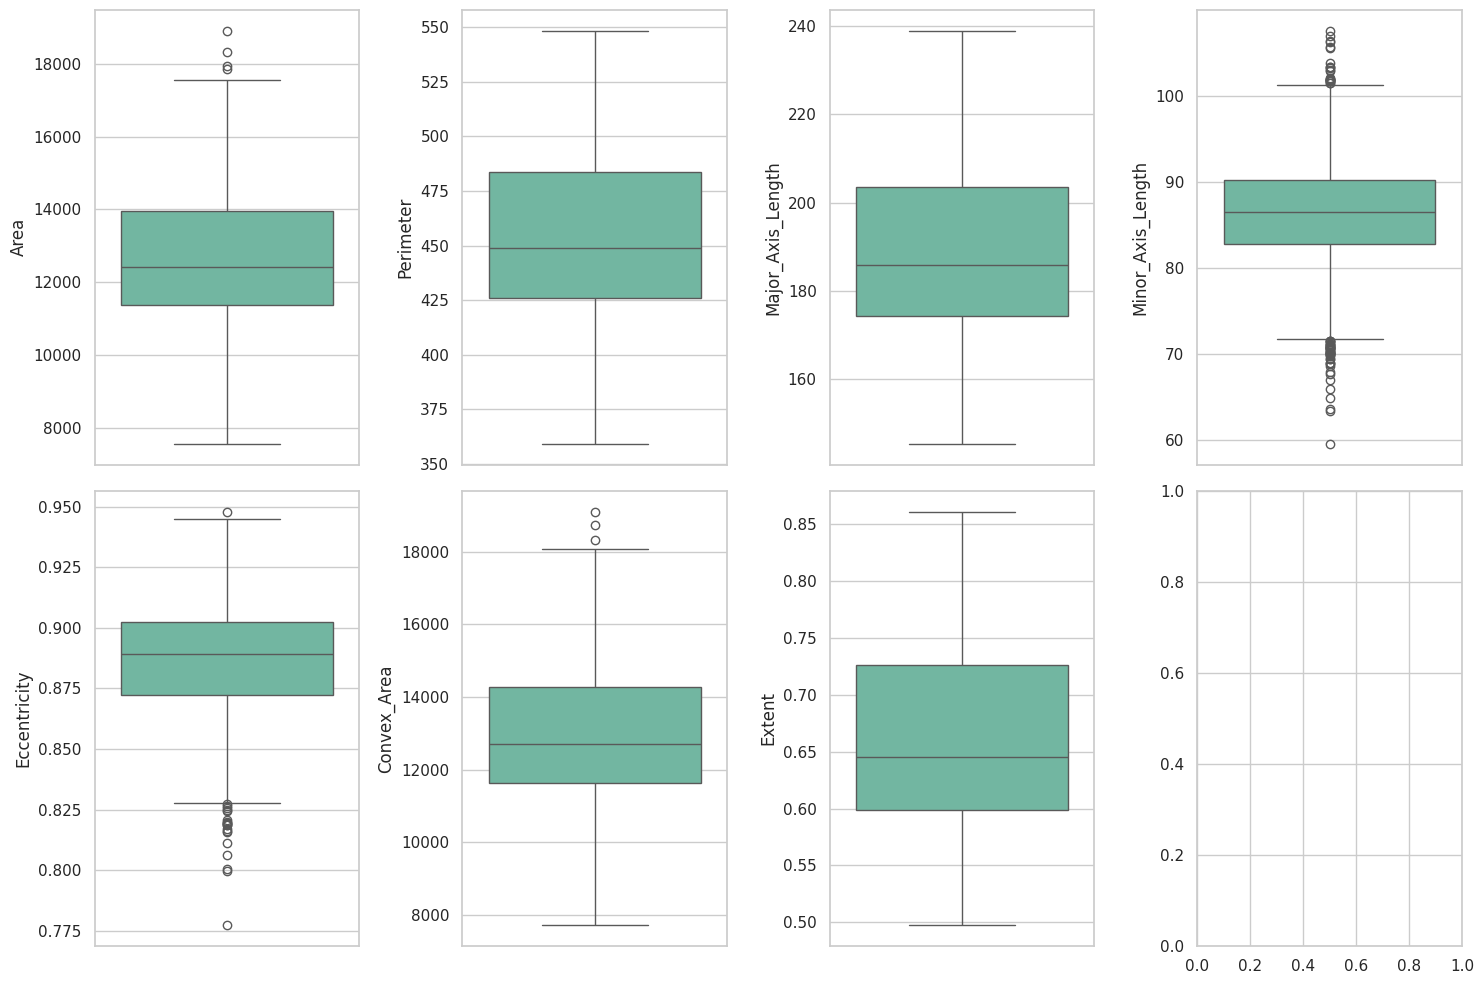

In [ ]:
sns.set(style="whitegrid", palette="Set2")

# Create subplots in a 2x4 grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
axes = axes.flatten()

# Plot box plots for each numerical column
for i, column in enumerate(df.columns[:-1]):
    sns.boxplot(y=column, data=df, ax=axes[i], showfliers=True)

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

### **Co-Relation Matrix**

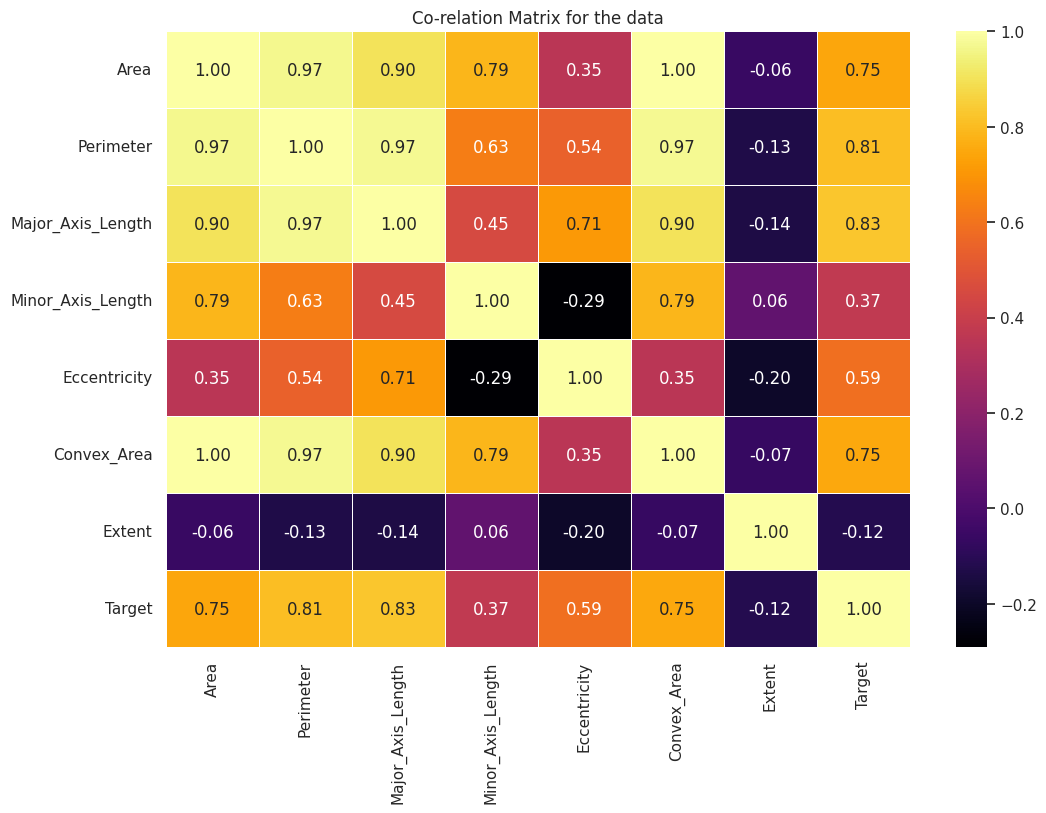

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f", linewidths=.5)
plt.title('Co-relation Matrix for the data')
plt.show()

**Pairwise-Plot**

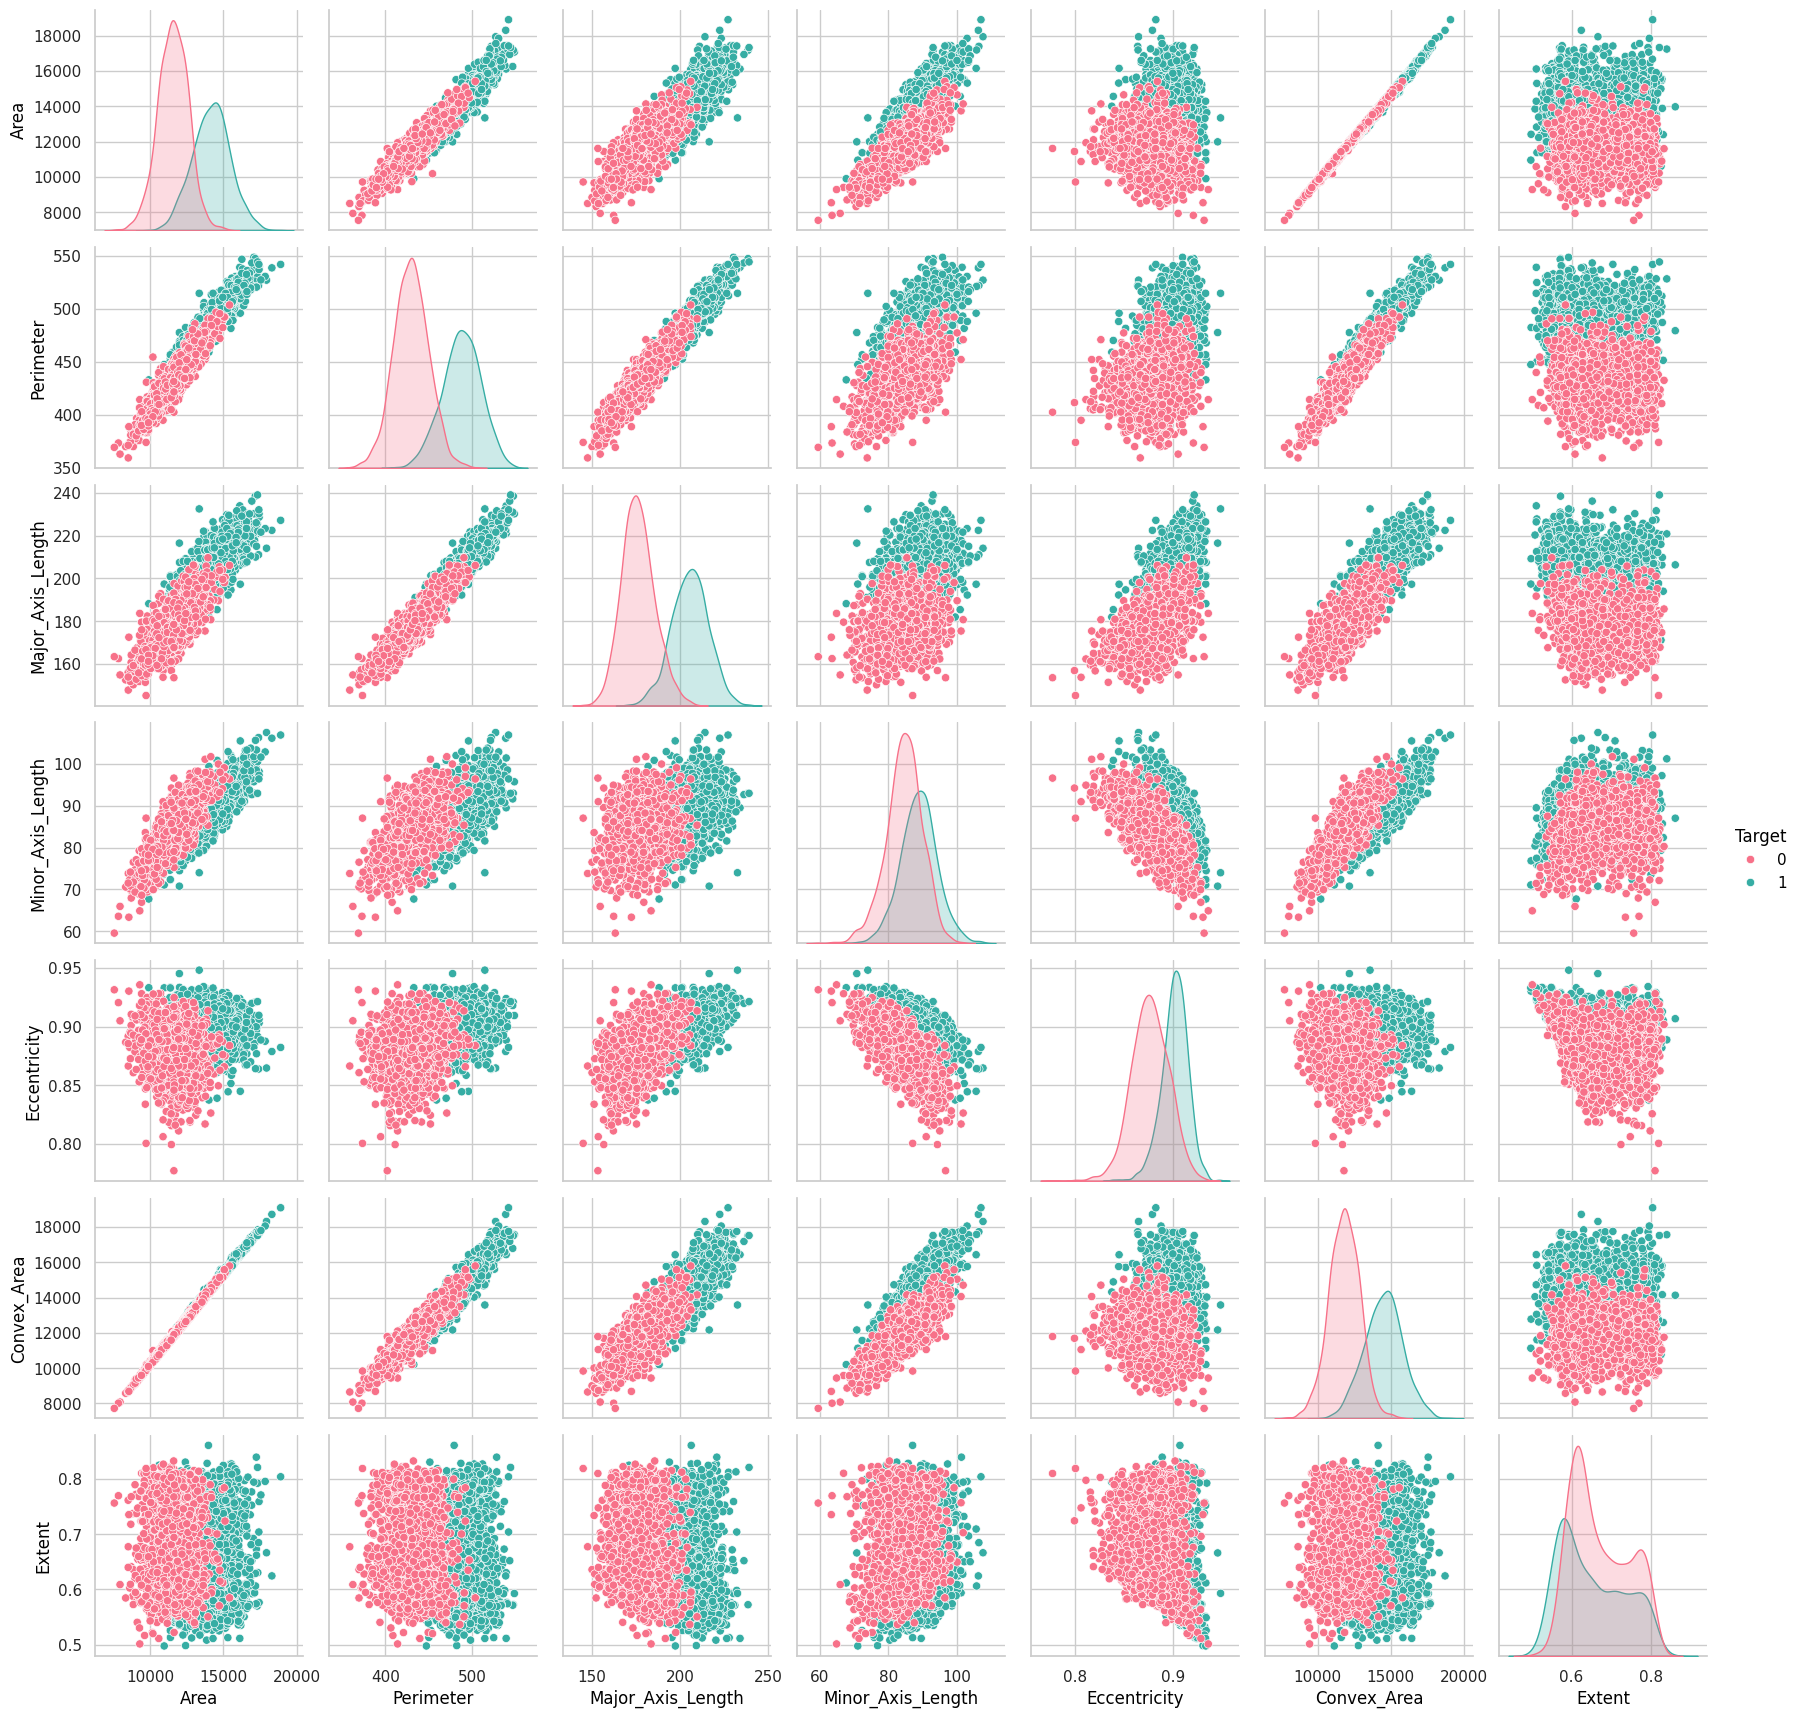

In [ ]:
sns.set(style="whitegrid", rc={"axes.labelcolor": "black", "text.color": "black"})
custom_palette = "husl"

# Create a pair plot with hue and custom color palette
sns.pairplot(df, hue='Target', palette=custom_palette)

# Show the plot
plt.show()

### **Bar Graph**

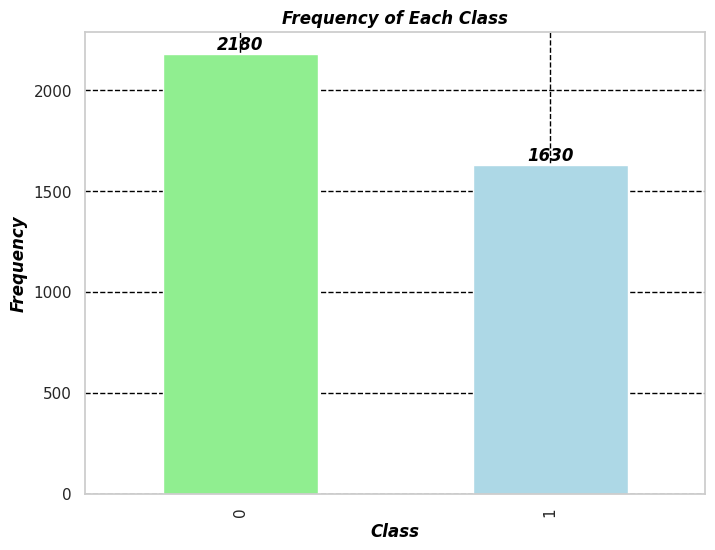

In [ ]:
class_counts = df['Target'].value_counts()
class_percentages = df['Target'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))

class_counts.plot(kind='bar', color=['lightgreen', 'lightblue', 'lightcoral'])
plt.grid(color='black', linestyle='dashed', linewidth=1)


plt.title('Frequency of Each Class', fontweight='bold', style='italic')
plt.xlabel('Class', fontweight='bold', style='italic')
plt.ylabel('Frequency', fontweight='bold', style='italic')

for i, v in enumerate(class_counts):
    plt.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold', style='italic')
plt.show()

# **Training and Testing**

**Splitting data into training set and testing set**

In [ ]:

X_modified = df.drop('Target', axis=1)
y_modified = df['Target']
X_train_modified, X_test_modified, y_train_modified, y_test_modified = train_test_split(X_modified, y_modified, test_size=0.3, stratify=y_modified, random_state=42)

# Calculate class distribution for the training set
unique_classes_train_modified, counts_train_modified = pd.Series(y_train_modified).value_counts().sort_index().items(), len(y_train_modified)
print("Distribution of Training Set Class:")
print(f"Instances: {counts_train_modified}")
for cls, count in unique_classes_train_modified:
    print(f"Class {cls}: {count} instances, {count / counts_train_modified * 100:.2f}%")

# Calculate class distribution for the testing set
unique_classes_test_modified, counts_test_modified = pd.Series(y_test_modified).value_counts().sort_index().items(), len(y_test_modified)
print("\nDistribution of Testing Set Class:")
print(f"Instances: {counts_test_modified}")
for cls, count in unique_classes_test_modified:
    print(f"Class {cls}: {count} instances, {count / counts_test_modified * 100:.2f}%")

Distribution of Training Set Class:
Instances: 2667
Class 0: 1526 instances, 57.22%
Class 1: 1141 instances, 42.78%

Distribution of Testing Set Class:
Instances: 1143
Class 0: 654 instances, 57.22%
Class 1: 489 instances, 42.78%


**KDE-Histogram**

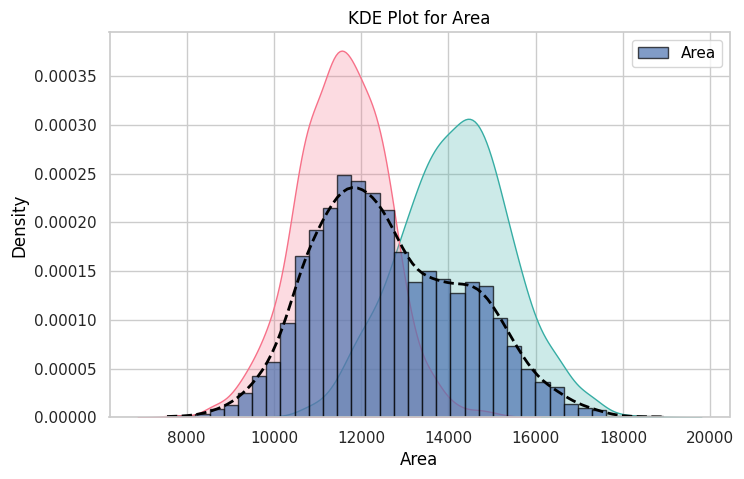

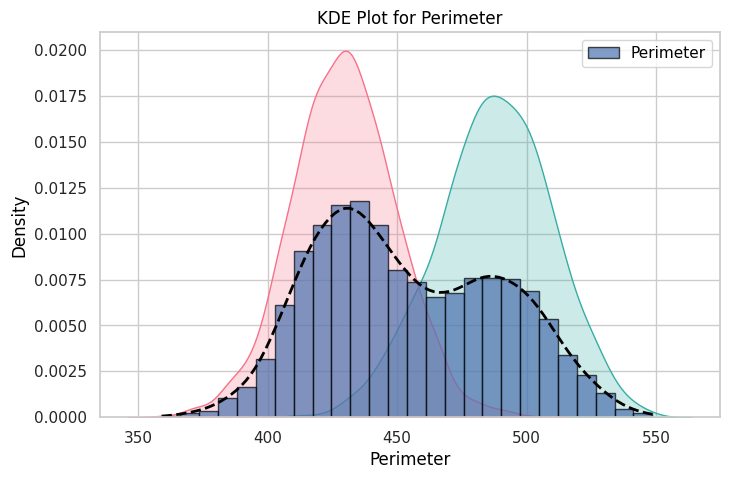

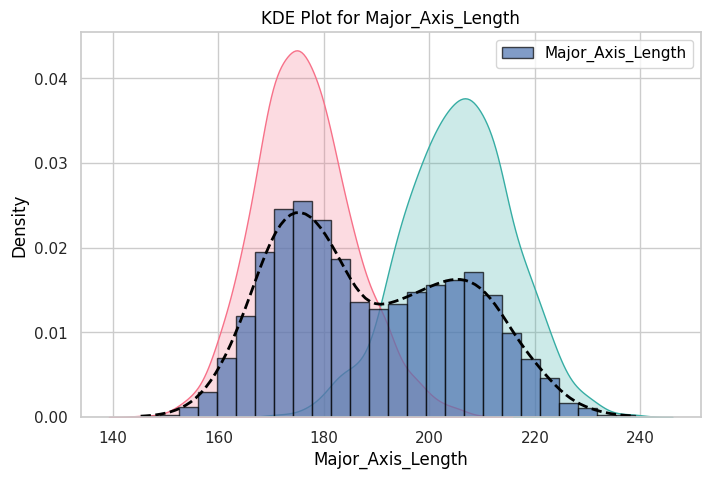

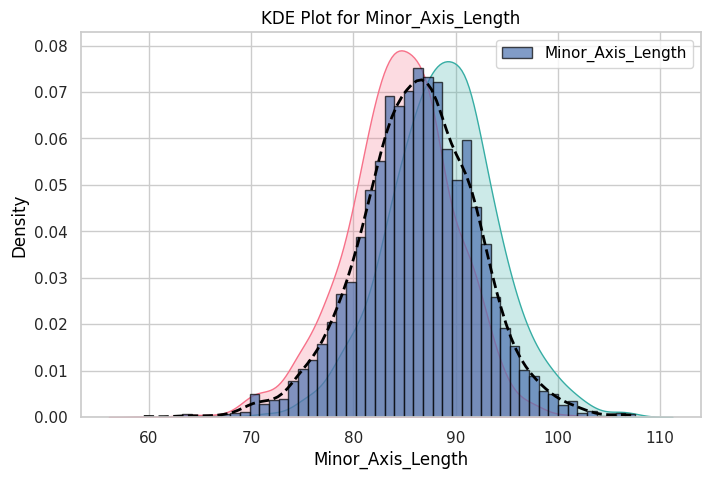

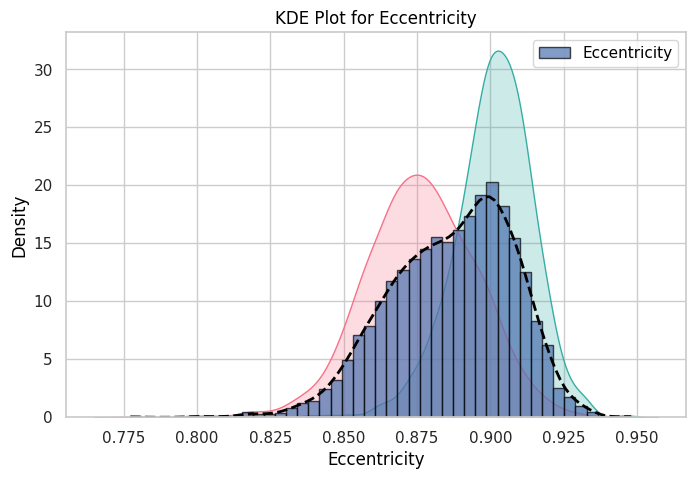

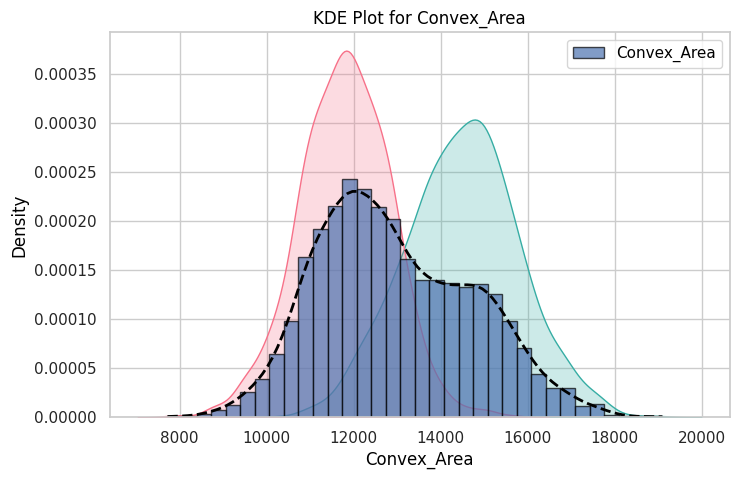

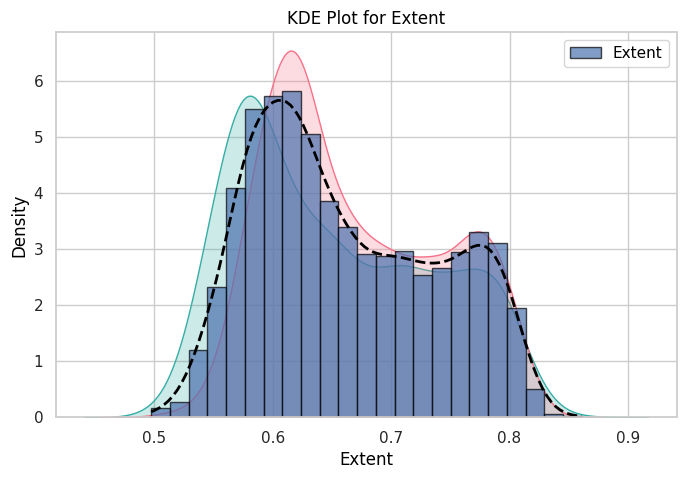

In [ ]:
for attribute in df.columns[:-1]:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df, x=attribute, hue='Target', common_norm=False, fill=True, palette='husl')
    plt.title(f'KDE Plot for {attribute}')

    # Create a 1D histogram of the attribute
    hist_plot = plt.hist(df[attribute], bins='auto', edgecolor='black', alpha=0.7, density=True, label=attribute)

    # Overlay the KDE plot over the histogram
    kde = gaussian_kde(df[attribute])
    x = np.linspace(df[attribute].min(), df[attribute].max(), 100)
    plt.plot(x, kde(x), color='black', linestyle='--', linewidth=2)

    plt.legend()
    plt.show()

### **Random Forest Classifier**


Random Forest Accuracy: 92.13%

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       654
           1       0.91      0.91      0.91       489

    accuracy                           0.92      1143
   macro avg       0.92      0.92      0.92      1143
weighted avg       0.92      0.92      0.92      1143



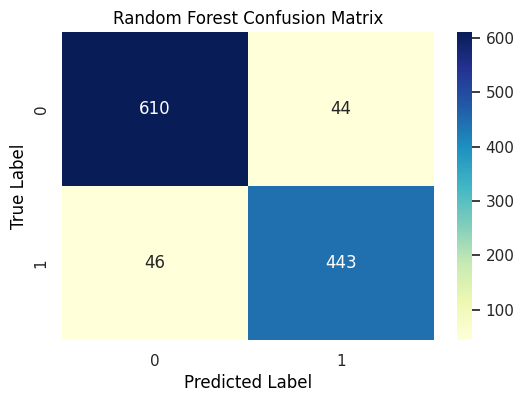

In [ ]:
# Create Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training set
rf_classifier.fit(X_train_modified, y_train_modified)

# Make predictions on the testing set
y_pred_rf = rf_classifier.predict(X_test_modified)

# Evaluate the performance of the Random Forest classifier
accuracy_rf = accuracy_score(y_test_modified, y_pred_rf)
print(f"\nRandom Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Print classification report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test_modified, y_pred_rf))

# Print confusion matrix
conf_matrix_rf = confusion_matrix(y_test_modified, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### **Decision Trees Classifier**


Decision Tree Accuracy: 88.28%

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       654
           1       0.85      0.88      0.86       489

    accuracy                           0.88      1143
   macro avg       0.88      0.88      0.88      1143
weighted avg       0.88      0.88      0.88      1143



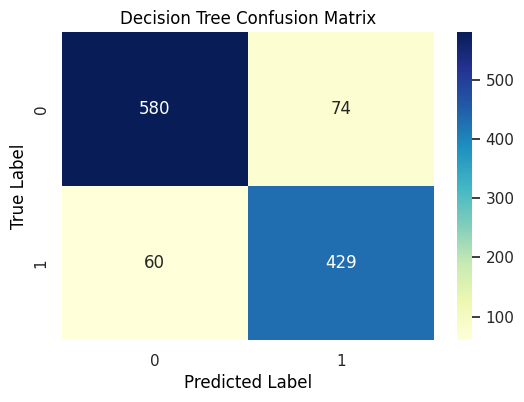

In [ ]:


# Create Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)  # You can adjust parameters based on your needs

# Train the classifier on the training set
dt_classifier.fit(X_train_modified, y_train_modified)

# Make predictions on the testing set
y_pred_dt = dt_classifier.predict(X_test_modified)

# Evaluate the performance of the Decision Tree classifier
accuracy_dt = accuracy_score(y_test_modified, y_pred_dt)
print(f"\nDecision Tree Accuracy: {accuracy_dt * 100:.2f}%")

# Print classification report
print("\nDecision Tree Classification Report:")
print(classification_report(y_test_modified, y_pred_dt))

# Print confusion matrix
conf_matrix_dt = confusion_matrix(y_test_modified, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=dt_classifier.classes_, yticklabels=dt_classifier.classes_)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### **SVM Classifier**


SVM Accuracy: 93.53%

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       654
           1       0.92      0.92      0.92       489

    accuracy                           0.94      1143
   macro avg       0.93      0.93      0.93      1143
weighted avg       0.94      0.94      0.94      1143



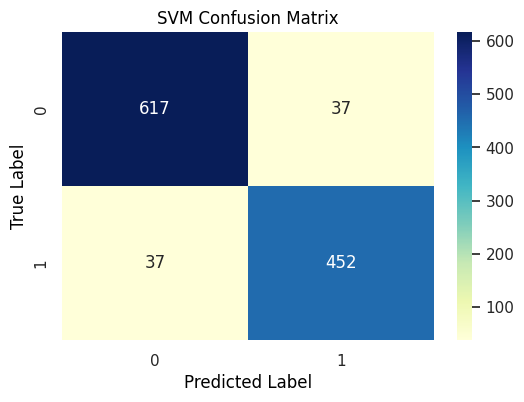

In [ ]:
# Create SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # You can choose different kernels like 'linear', 'rbf', etc.

# Train the classifier on the training set
svm_classifier.fit(X_train_modified, y_train_modified)

# Make predictions on the testing set
y_pred_svm = svm_classifier.predict(X_test_modified)

# Evaluate the performance of the SVM classifier
accuracy_svm = accuracy_score(y_test_modified, y_pred_svm)
print(f"\nSVM Accuracy: {accuracy_svm * 100:.2f}%")

# Print classification report
print("\nSVM Classification Report:")
print(classification_report(y_test_modified, y_pred_svm))

# Print confusion matrix
conf_matrix_svm = confusion_matrix(y_test_modified, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### **Logistic Regression**


Logistic Regression Accuracy: 93.26%

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       654
           1       0.92      0.93      0.92       489

    accuracy                           0.93      1143
   macro avg       0.93      0.93      0.93      1143
weighted avg       0.93      0.93      0.93      1143



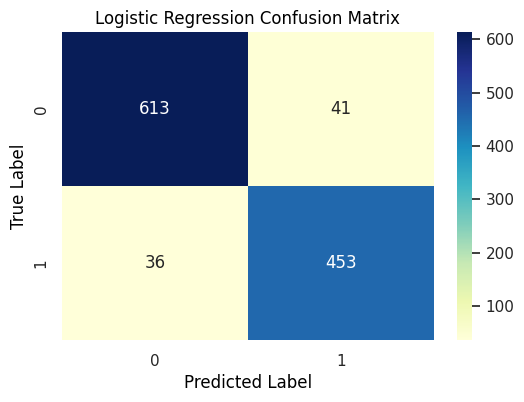

In [ ]:
# Create Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42, max_iter=1000)  # You can adjust parameters based on your needs

# Train the classifier on the training set
logreg_classifier.fit(X_train_modified, y_train_modified)

# Make predictions on the testing set
y_pred_logreg = logreg_classifier.predict(X_test_modified)

# Evaluate the performance of the Logistic Regression classifier
accuracy_logreg = accuracy_score(y_test_modified, y_pred_logreg)
print(f"\nLogistic Regression Accuracy: {accuracy_logreg * 100:.2f}%")

# Print classification report
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test_modified, y_pred_logreg))

# Print confusion matrix
conf_matrix_logreg = confusion_matrix(y_test_modified, y_pred_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='YlGnBu', xticklabels=logreg_classifier.classes_, yticklabels=logreg_classifier.classes_)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### **KNN Classifier**


Accuracy: 87.66%

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       654
           1       0.88      0.82      0.85       489

    accuracy                           0.88      1143
   macro avg       0.88      0.87      0.87      1143
weighted avg       0.88      0.88      0.88      1143



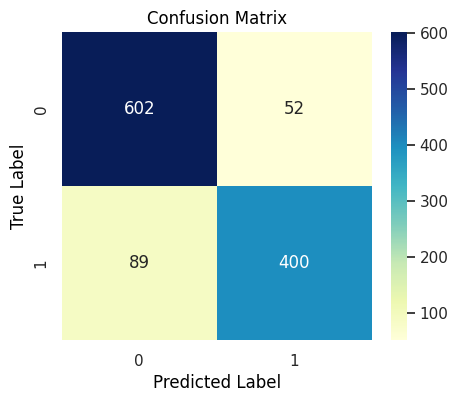

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed

# Train the classifier on the training set
knn_classifier.fit(X_train_modified, y_train_modified)

# Make predictions on the testing set
y_pred_knn = knn_classifier.predict(X_test_modified)

# Evaluate the performance of the KNN classifier
accuracy = accuracy_score(y_test_modified, y_pred_knn)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_modified, y_pred_knn))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test_modified, y_pred_knn)

# Plot the confusion matrix with different colors and size
plt.figure(figsize=(5, 4))  # Adjust the figure size as needed
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Initialize classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=5)
svm_classifier = SVC(kernel='linear', random_state=42)
logreg_classifier = LogisticRegression(random_state=42, max_iter=1000)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)

classifiers = [knn_classifier, svm_classifier, logreg_classifier, rf_classifier, dt_classifier]
classifier_names = ['KNN', 'SVM', 'Logistic Regression', 'Random Forest', 'Decision Tree']

# Initialize PrettyTable
table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision (weighted)", "Recall (weighted)", "F1 Score (weighted)"]

for clf, name in zip(classifiers, classifier_names):
    # Train the classifier on the training set
    clf.fit(X_train_modified, y_train_modified)

    # Make predictions on the testing set
    y_pred = clf.predict(X_test_modified)

    # Evaluate the performance
    accuracy = accuracy_score(y_test_modified, y_pred)
    classification_rep = classification_report(y_test_modified, y_pred, output_dict=True)

    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']

    # Add the results to the table
    table.add_row([name, f"{accuracy * 100:.2f}%", f"{precision:.2f}", f"{recall:.2f}", f"{f1_score:.2f}"])

# Print the table
print(table)



+---------------------+----------+----------------------+-------------------+---------------------+
|        Model        | Accuracy | Precision (weighted) | Recall (weighted) | F1 Score (weighted) |
+---------------------+----------+----------------------+-------------------+---------------------+
|         KNN         |  87.66%  |         0.88         |        0.88       |         0.88        |
|         SVM         |  93.53%  |         0.94         |        0.94       |         0.94        |
| Logistic Regression |  93.26%  |         0.93         |        0.93       |         0.93        |
|    Random Forest    |  92.13%  |         0.92         |        0.92       |         0.92        |
|    Decision Tree    |  88.28%  |         0.88         |        0.88       |         0.88        |
+---------------------+----------+----------------------+-------------------+---------------------+


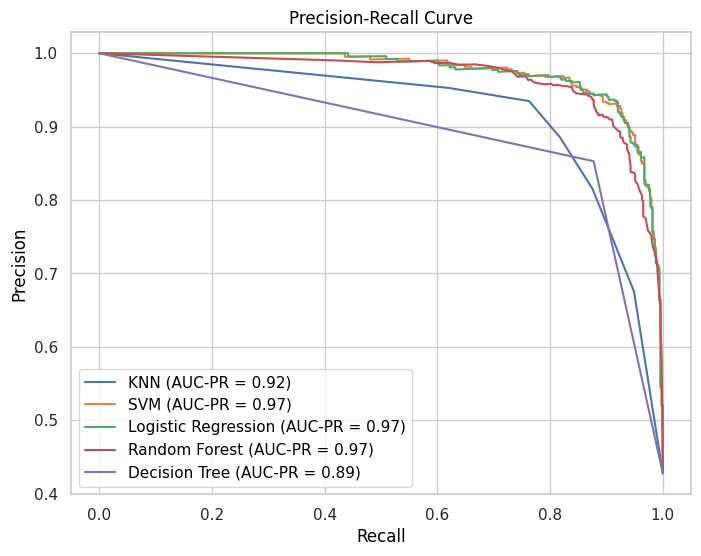

In [ ]:
# Initialize classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=5)
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
logreg_classifier = LogisticRegression(random_state=42, max_iter=1000)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)

classifiers = [knn_classifier, svm_classifier, logreg_classifier, rf_classifier, dt_classifier]
classifier_names = ['KNN', 'SVM', 'Logistic Regression', 'Random Forest', 'Decision Tree']

# Plot AUC-PR curve for each classifier
plt.figure(figsize=(8, 6))

for clf, name in zip(classifiers, classifier_names):
    # Train the classifier on the training set
    clf.fit(X_train_modified, y_train_modified)

    # Predict probabilities for the positive class
    y_prob = clf.predict_proba(X_test_modified)[:, 1]

    # Calculate precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test_modified, y_prob)

    # Calculate AUC (Area Under the Curve) for precision-recall curve
    auc_pr = auc(recall, precision)

    # Plot precision-recall curve
    plt.plot(recall, precision, label=f'{name} (AUC-PR = {auc_pr:.2f})')

# Set plot labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

# Show the plot
plt.show()
